<a target="_blank" href=" https://colab.research.google.com/drive/1fKZTKgMlJh__QAQLAMzrfureBYbXideC#scrollTo=qxH2zkO9TJ5t ">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Bibliotekos

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Duomenų importavimas / tvarkymas

In [ ]:
duomenys = pd.read_csv('GR.csv', sep="|", encoding='utf8')

duomenys

,nr,fiz_asm_lyt,fiz_asm_amzius,fiz_asm_pilietybe,deklarav_metai,deklarav_ketvirtis,sav_kodas,sav_pavadinimas,data_formav
0,2682929,M,45-54,Lietuvos,2007.0,K2,13.0,Vilniaus m. sav.,2023-01-30
1,2733183,M,7-17,Lietuvos,2016.0,K3,78.0,Telšių r. sav.,2023-01-30
2,156709,V,45-54,Lietuvos,2001.0,K4,48.0,Kalvarijos sav.,2023-01-30
3,1039124,M,7-17,Lietuvos,2017.0,K1,89.0,Širvintų r. sav.,2023-01-30
4,1206839,M,35-44,Lietuvos,2009.0,K4,13.0,Vilniaus m. sav.,2023-01-30
...,...,...,...,...,...,...,...,...,...
3076228,229042,V,35-44,Lietuvos,2021.0,K2,13.0,Vilniaus m. sav.,2023-01-30
3076229,365500,M,0-6,Lietuvos,2017.0,K1,11.0,Alytaus m. sav.,2023-01-30
3076230,3820,V,55-64,Lietuvos,1988.0,K2,48.0,Kalvarijos sav.,2023-01-30
3076231,1398863,M,7-17,Lietuvos,2015.0,K4,52.0,Kauno r. sav.,2023-01-30


In [ ]:
#patikrinta, kiek yra įrašų iš viso
duomenys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076233 entries, 0 to 3076232
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   nr                  int64  
 1   fiz_asm_lyt         object 
 2   fiz_asm_amzius      object 
 3   fiz_asm_pilietybe   object 
 4   deklarav_metai      float64
 5   deklarav_ketvirtis  object 
 6   sav_kodas           float64
 7   sav_pavadinimas     object 
 8   data_formav         object 
dtypes: float64(2), int64(1), object(6)
memory usage: 211.2+ MB


In [ ]:
# Patikrinta, kiek ir kokių įrašų trūksta
duomenys.isnull().sum()

nr                       0
fiz_asm_lyt              0
fiz_asm_amzius           0
fiz_asm_pilietybe        0
deklarav_metai        1625
deklarav_ketvirtis    1625
sav_kodas               10
sav_pavadinimas         10
data_formav              0
dtype: int64

In [ ]:
#atrinkti tik darbui reikalingi stulpeliai
darbui = duomenys[['fiz_asm_lyt', 'fiz_asm_amzius',	'fiz_asm_pilietybe', 'sav_pavadinimas']]

darbui

,fiz_asm_lyt,fiz_asm_amzius,fiz_asm_pilietybe,sav_pavadinimas
0,M,45-54,Lietuvos,Vilniaus m. sav.
1,M,7-17,Lietuvos,Telšių r. sav.
2,V,45-54,Lietuvos,Kalvarijos sav.
3,M,7-17,Lietuvos,Širvintų r. sav.
4,M,35-44,Lietuvos,Vilniaus m. sav.
...,...,...,...,...
3076228,V,35-44,Lietuvos,Vilniaus m. sav.
3076229,M,0-6,Lietuvos,Alytaus m. sav.
3076230,V,55-64,Lietuvos,Kalvarijos sav.
3076231,M,7-17,Lietuvos,Kauno r. sav.


In [ ]:
darbui['fiz_asm_lyt'].unique()

array(['M', 'V'], dtype=object)

In [ ]:
darbui.sort_values(by='fiz_asm_amzius', ascending=True)['fiz_asm_amzius'].unique()


array(['0-6', '18-24', '25-34', '35-44', '45-54', '55-64', '65-84',
       '7-17', '85+'], dtype=object)

In [ ]:
age_ranges = ['0-6', '18-24', '25-34', '35-44', '45-54', '55-64', '65-84',
       '7-17', '85+']
age_mapping = {
    '0-6': 1,
    '7-17': 2,
    '18-24': 3,
    '25-34': 4,
    '35-44': 5,
    '45-54': 6,
    '55-64': 7,
    '65-84': 8,
    '85+': 9
}
sorted_age_ranges = sorted(age_ranges, key=lambda x: age_mapping[x])
print(sorted_age_ranges)

['0-6', '7-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-84', '85+']


In [ ]:
def amziaus_grupe(eilute):
    if eilute['fiz_asm_amzius'] == '0-6' or eilute['fiz_asm_amzius'] == '7-17':
        return 'Vaikai'
    elif eilute['fiz_asm_amzius'] == '18-24' or eilute['fiz_asm_amzius'] == '25-34':
        return 'Jaunimas'
    elif eilute['fiz_asm_amzius'] == '35-44' or eilute['fiz_asm_amzius'] == '45-54' or eilute['fiz_asm_amzius'] == '55-64':
        return 'Vidutinio amžiaus'
    else:
        return 'Senjorai'

darbui['amziaus_grupe'] = darbui.apply(amziaus_grupe, axis=1)
darbui

<ipython-input-21-d5ef4b9528f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darbui['amziaus_grupe'] = darbui.apply(amziaus_grupe, axis=1)


,fiz_asm_lyt,fiz_asm_amzius,fiz_asm_pilietybe,sav_pavadinimas,amziaus_grupe
0,M,45-54,Lietuvos,Vilniaus m. sav.,Vidutinio amžiaus
1,M,7-17,Lietuvos,Telšių r. sav.,Vaikai
2,V,45-54,Lietuvos,Kalvarijos sav.,Vidutinio amžiaus
3,M,7-17,Lietuvos,Širvintų r. sav.,Vaikai
4,M,35-44,Lietuvos,Vilniaus m. sav.,Vidutinio amžiaus
...,...,...,...,...,...
3076228,V,35-44,Lietuvos,Vilniaus m. sav.,Vidutinio amžiaus
3076229,M,0-6,Lietuvos,Alytaus m. sav.,Vaikai
3076230,V,55-64,Lietuvos,Kalvarijos sav.,Vidutinio amžiaus
3076231,M,7-17,Lietuvos,Kauno r. sav.,Vaikai


In [ ]:
darbui['fiz_asm_pilietybe'].unique()

array(['Lietuvos', 'Kita', 'Be pilietybės/Nenustatyta/Nenurodyta'],
      dtype=object)

In [ ]:
 #sutrumpinamas reikšmės pateikimas
darbui.replace('Be pilietybės/Nenustatyta/Nenurodyta',
           'Nenustatyta',
           inplace=True)

#patikrintas rezultatas
darbui.loc[darbui['fiz_asm_pilietybe'] == 'Nenustatyta']

<ipython-input-23-bb606a425644>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darbui.replace('Be pilietybės/Nenustatyta/Nenurodyta',


,fiz_asm_lyt,fiz_asm_amzius,fiz_asm_pilietybe,sav_pavadinimas,amziaus_grupe
51,M,7-17,Nenustatyta,Vilniaus m. sav.,Vaikai
180,V,0-6,Nenustatyta,Vilniaus r. sav.,Vaikai
512,V,7-17,Nenustatyta,Kauno m. sav.,Vaikai
640,M,7-17,Nenustatyta,Kazlų Rūdos sav.,Vaikai
688,M,7-17,Nenustatyta,Panevėžio m. sav.,Vaikai
...,...,...,...,...,...
3075107,M,7-17,Nenustatyta,Anykščių r. sav.,Vaikai
3075164,M,7-17,Nenustatyta,Klaipėdos r. sav.,Vaikai
3075470,M,7-17,Nenustatyta,Kretingos r. sav.,Vaikai
3075840,M,7-17,Nenustatyta,Švenčionių r. sav.,Vaikai


# 1. Moterų ir vyrų skaičiaus santykis

In [ ]:
moterys = int(darbui.loc[darbui['fiz_asm_lyt'] == 'M'].count()['fiz_asm_lyt'])

vyrai = int(darbui.loc[darbui['fiz_asm_lyt'] == 'V'].count()['fiz_asm_lyt'])

skirtumas_vnt = moterys - vyrai
skirtumas_proc = int(moterys / vyrai * 100 - 100)

if vyrai > moterys:
    print(f"""\033[1m
    Iš viso moterų: {moterys}
    Iš viso vyrų: {vyrai}
    Skirtumas vienetais: vyrų yra {skirtumas_vnt} daugiau nei moterų
    Skirtumas procentais: vyrų yra {skirtumas_proc} % daugiau nei moterų\033[0m""")

else:
    print(f"""\033[1m
    Iš viso moterų: {moterys}
    Iš viso vyrų: {vyrai}
    Skirtumas vienetais: moterų yra {skirtumas_vnt} daugiau nei vyrų
    Skirtumas procentais: moterų yra {skirtumas_proc} % daugiau nei vyrų\033[0m""")



    Iš viso moterų: 1604440
    Iš viso vyrų: 1471793
    Skirtumas vienetais: moterų yra 132647 daugiau nei vyrų
    Skirtumas procentais: moterų yra 9 % daugiau nei vyrų


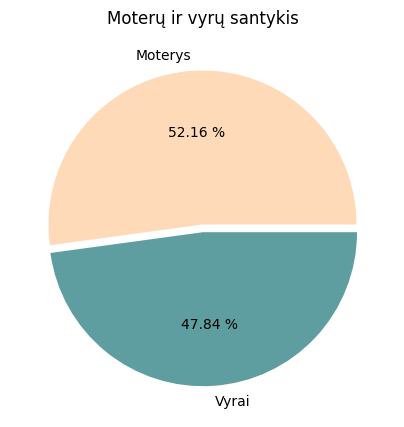

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(5,5))
colors = ['peachpuff' , 'cadetblue']
plt.pie([moterys, vyrai], labels=['Moterys', 'Vyrai'], autopct='%.2f %%', explode=[0, 0.05], colors=colors)

plt.title('Moterų ir vyrų santykis')

plt.show()


# 2. TOP daugiausiai ir mažiausiai gyventojų turinčios savivaldybės

In [ ]:
#paskaičiuojamas gyventojų skaičius savivaldybėse
viso_gyventoju = darbui.groupby('sav_pavadinimas').count()['amziaus_grupe'].sort_values(ascending=False)
viso_gyventoju.head(5).append(viso_gyventoju.tail(5))

<ipython-input-26-2f71be67c7fd>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  viso_gyventoju.head(5).append(viso_gyventoju.tail(5))


sav_pavadinimas
Vilniaus m. sav.     627332
Kauno m. sav.        319976
Klaipėdos m. sav.    172634
Šiaulių m. sav.      115710
Vilniaus r. sav.     114917
Kalvarijos sav.       10643
Pagėgių sav.           8163
Rietavo sav.           7789
Neringos sav.          5367
Birštono sav.          4451
Name: amziaus_grupe, dtype: int64

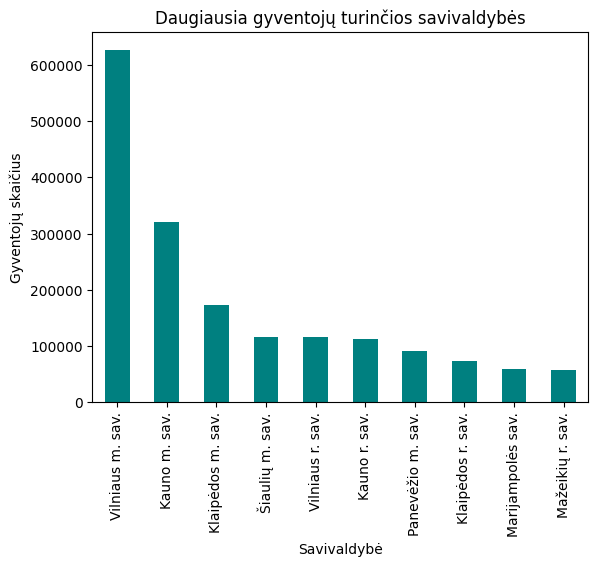

In [ ]:
#daugiausiai gyventojų turinčios savivaldybės
# figure(figsize=(5,5))

max_gyventoju=viso_gyventoju.sort_values(ascending=False).head(10)
max_gyventoju.plot(kind='bar', color='teal')

plt.title('Daugiausia gyventojų turinčios savivaldybės')

plt.xlabel('Savivaldybė')
plt.ylabel('Gyventojų skaičius')

plt.show()

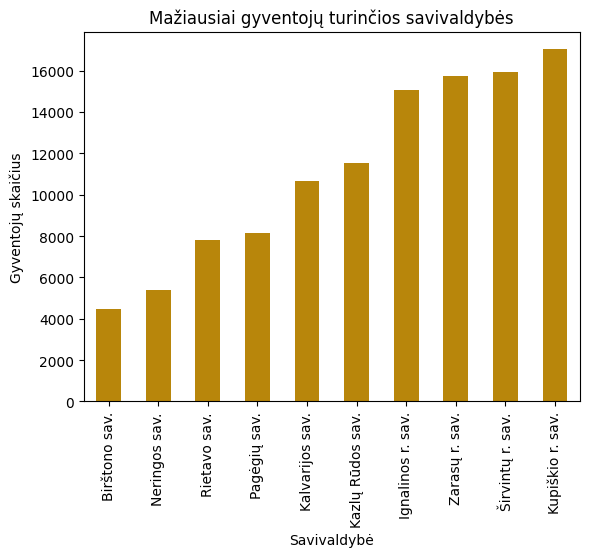

In [ ]:
#mažiausiai gyventojų turinčios savivaldybės

# figure(figsize=(5,5))

min_gyventoju=viso_gyventoju.sort_values(ascending=True).head(10)
min_gyventoju.plot(kind='bar', color='darkgoldenrod')

plt.title('Mažiausiai gyventojų turinčios savivaldybės')

plt.xlabel('Savivaldybė')
plt.ylabel('Gyventojų skaičius')

plt.show()

# 3. TOP "jauniausios" ir "vyriausios" savivaldybės

In [ ]:
#paskaičiuojama savivaldybės gyventojų, priskiriama grupei 'Senjorai'
max_amzius = darbui.loc[darbui['amziaus_grupe'] == 'Senjorai'].groupby('sav_pavadinimas').count()['amziaus_grupe'].sort_values(ascending=False)
max_amzius.head(10)

sav_pavadinimas
Vilniaus m. sav.     106155
Kauno m. sav.         67658
Klaipėdos m. sav.     34350
Šiaulių m. sav.       22600
Panevėžio m. sav.     21628
Vilniaus r. sav.      16973
Kauno r. sav.         16650
Alytaus m. sav.       12662
Marijampolės sav.     11428
Kėdainių r. sav.      10885
Name: amziaus_grupe, dtype: int64

In [ ]:
#paskaičiuojama savivaldybės gyventojų, priskiriama grupei 'Vaikai'
min_amzius = darbui.loc[darbui['amziaus_grupe'] == 'Vaikai'].groupby('sav_pavadinimas').count()['amziaus_grupe'].sort_values(ascending=False)
min_amzius.head(10)

sav_pavadinimas
Vilniaus m. sav.     124545
Kauno m. sav.         56547
Klaipėdos m. sav.     32712
Kauno r. sav.         22503
Vilniaus r. sav.      21869
Šiaulių m. sav.       19195
Klaipėdos r. sav.     14526
Panevėžio m. sav.     14132
Marijampolės sav.      9914
Mažeikių r. sav.       9745
Name: amziaus_grupe, dtype: int64

In [ ]:
#didžiausias procentas Senjorų pagal bendrą savivaldybės gyventojų skaičių
seniausia_sav = (max_amzius*100/viso_gyventoju).sort_values(ascending=False).head(10)
seniausia_sav

sav_pavadinimas
Ignalinos r. sav.    26.964725
Birštono sav.        25.207818
Anykščių r. sav.     25.191122
Zarasų r. sav.       24.764751
Visagino sav.        24.614825
Varėnos r. sav.      24.559964
Akmenės r. sav.      24.265850
Biržų r. sav.        24.188166
Rokiškio r. sav.     24.154872
Kupiškio r. sav.     24.145224
Name: amziaus_grupe, dtype: float64

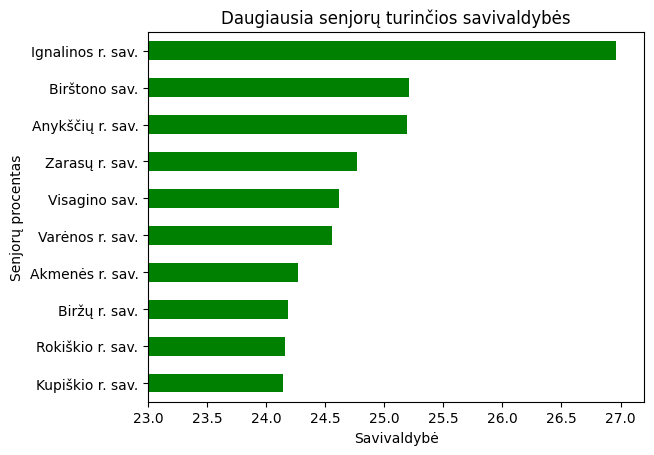

In [ ]:
# figure(figsize=(5,5))

seniausia_sav.sort_values().plot(kind='barh', color='green')

plt.xlim(23, 27.2)

plt.title('Daugiausia senjorų turinčios savivaldybės')

plt.xlabel('Savivaldybė')
plt.ylabel('Senjorų procentas')

plt.show()

In [ ]:
 #didžiausias procentas Vaikų pagal bendrą savivaldybės gyventojų skaičių
jauniausia_sav = (min_amzius*100/viso_gyventoju).sort_values(ascending=False).head(10)
jauniausia_sav

sav_pavadinimas
Klaipėdos r. sav.    20.200812
Kauno r. sav.        20.145205
Vilniaus m. sav.     19.853124
Vilniaus r. sav.     19.030257
Klaipėdos m. sav.    18.948759
Kretingos r. sav.    18.080876
Kauno m. sav.        17.672263
Kalvarijos sav.      17.607817
Mažeikių r. sav.     17.433228
Šilutės r. sav.      17.360283
Name: amziaus_grupe, dtype: float64

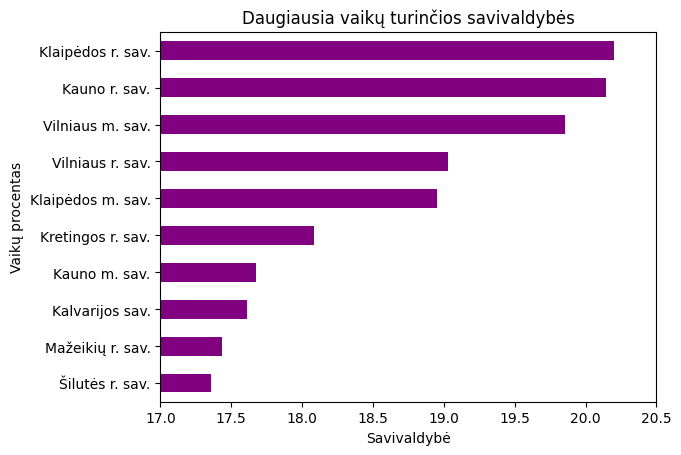

In [ ]:
# figure(figsize=(5,5))

jauniausia_sav.sort_values().plot(kind='barh', color='purple')

plt.xlim(17, 20.5)

plt.title('Daugiausia vaikų turinčios savivaldybės')

plt.xlabel('Savivaldybė')
plt.ylabel('Vaikų procentas')

plt.show()

# 4. Lietuvos gyventojų turimos pilietybės


In [ ]:
lietuvos_pilietybe = int(darbui.loc[darbui['fiz_asm_pilietybe'] == 'Lietuvos'].count()['fiz_asm_pilietybe'])
kita_pilietybe = int(darbui.loc[darbui['fiz_asm_pilietybe'] == 'Kita'].count()['fiz_asm_pilietybe'])
nenustatyta_pilietybe = int(darbui.loc[darbui['fiz_asm_pilietybe'] == 'Nenustatyta'].count()['fiz_asm_pilietybe'])

print(f"""\033[1m
Paskaičiuota, jog:
Lietuvos pilietybę turi {lietuvos_pilietybe} asmenys,
kitos šalies pilietybę turi {kita_pilietybe} asmenys,
{nenustatyta_pilietybe} asmenys neturi pilietybės arba ji nenustatyta.\033[0m""")



Paskaičiuota, jog:
Lietuvos pilietybę turi 2871332 asmenys,
kitos šalies pilietybę turi 187036 asmenys,
17865 asmenys neturi pilietybės arba ji nenustatyta.


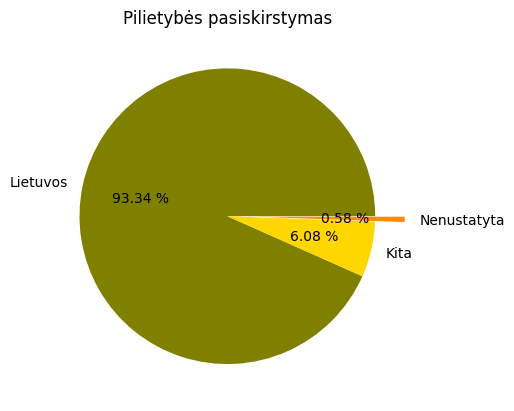

In [ ]:
# figure(figsize=(5,5))
colors = ['olive' , 'gold', 'darkorange']
plt.pie([lietuvos_pilietybe, kita_pilietybe, nenustatyta_pilietybe], labels=['Lietuvos', 'Kita', 'Nenustatyta'], autopct='%.2f %%', explode=[0, 0, 0.2], colors=colors)

plt.title('Pilietybės pasiskirstymas')

plt.show()


# 5. Gyventojų pasiskirstymas pagal požymius "Pilietybė nenustatyta" ir "Kita pilietybė"

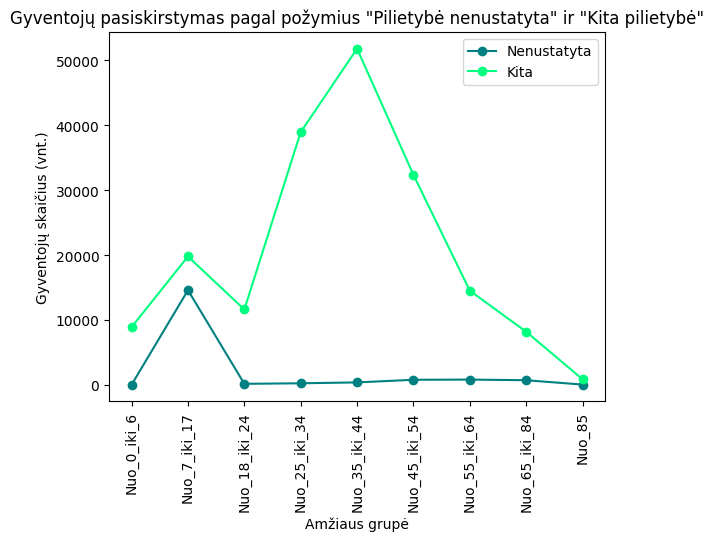

In [ ]:
pirm_Nuo_0_iki_6 = darbui.loc[(darbui['fiz_asm_amzius'] == '0-6') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_7_iki_17 = darbui.loc[(darbui['fiz_asm_amzius'] == '7-17') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_18_iki_24 = darbui.loc[(darbui['fiz_asm_amzius'] == '18-24') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_25_iki_34 = darbui.loc[(darbui['fiz_asm_amzius'] == '25-34') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_35_iki_44 = darbui.loc[(darbui['fiz_asm_amzius'] == '35-44') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_45_iki_54 = darbui.loc[(darbui['fiz_asm_amzius'] == '45-54') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_55_iki_64 = darbui.loc[(darbui['fiz_asm_amzius'] == '55-64') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_65_iki_84 = darbui.loc[(darbui['fiz_asm_amzius'] == '65-84') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()
pirm_Nuo_85 = darbui.loc[(darbui['fiz_asm_amzius'] == '85+') & (darbui['fiz_asm_pilietybe'] == 'Nenustatyta')]['fiz_asm_pilietybe'].count()

antr_Nuo_0_iki_6 = darbui.loc[(darbui['fiz_asm_amzius'] == '0-6') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_7_iki_17 = darbui.loc[(darbui['fiz_asm_amzius'] == '7-17') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_18_iki_24 = darbui.loc[(darbui['fiz_asm_amzius'] == '18-24') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_25_iki_34 = darbui.loc[(darbui['fiz_asm_amzius'] == '25-34') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_35_iki_44 = darbui.loc[(darbui['fiz_asm_amzius'] == '35-44') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_45_iki_54 = darbui.loc[(darbui['fiz_asm_amzius'] == '45-54') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_55_iki_64 = darbui.loc[(darbui['fiz_asm_amzius'] == '55-64') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_65_iki_84 = darbui.loc[(darbui['fiz_asm_amzius'] == '65-84') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()
antr_Nuo_85 = darbui.loc[(darbui['fiz_asm_amzius'] == '85+') & (darbui['fiz_asm_pilietybe'] == 'Kita')]['fiz_asm_pilietybe'].count()

x = ['Nuo_0_iki_6', 'Nuo_7_iki_17', 'Nuo_18_iki_24', 'Nuo_25_iki_34', 'Nuo_35_iki_44', 'Nuo_45_iki_54', 'Nuo_55_iki_64', 'Nuo_65_iki_84', 'Nuo_85']
y1 = [pirm_Nuo_0_iki_6, pirm_Nuo_7_iki_17, pirm_Nuo_18_iki_24, pirm_Nuo_25_iki_34, pirm_Nuo_35_iki_44, pirm_Nuo_45_iki_54, pirm_Nuo_55_iki_64, pirm_Nuo_65_iki_84, pirm_Nuo_85]
y2 = [antr_Nuo_0_iki_6, antr_Nuo_7_iki_17, antr_Nuo_18_iki_24, antr_Nuo_25_iki_34, antr_Nuo_35_iki_44, antr_Nuo_45_iki_54, antr_Nuo_55_iki_64, antr_Nuo_65_iki_84, antr_Nuo_85]

plt.title('Gyventojų pasiskirstymas pagal požymius "Pilietybė nenustatyta" ir "Kita pilietybė"')
plt.xticks(rotation=90)

plt.xlabel('Amžiaus grupė')
plt.ylabel('Gyventojų skaičius (vnt.)')

plt.plot(x, y1, label="Nenustatyta", color='teal', marker='o')
plt.plot(x, y2, label="Kita", color='springgreen', marker='o')

plt.legend()

plt.show()
